# Linear Regression

In [1]:
# Install Tensorflow
# direct tensorflow installation throws tensorboard version error on my env
# so install tensorboard 2.0.0 first
# ! pip install tensorboard==2.0.0
# ! pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the data
https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

In [4]:
# Load in the data
data = pd.read_csv('../../../data/moore.csv', header=None).values
X = data[:,0].reshape(-1,1) # make it a 2-D array of size N X D where D = 1
Y = data[:,1]

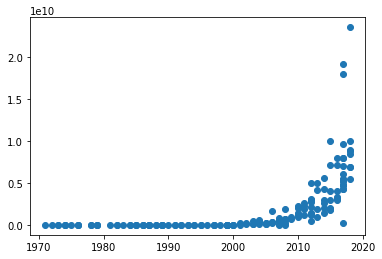

In [5]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

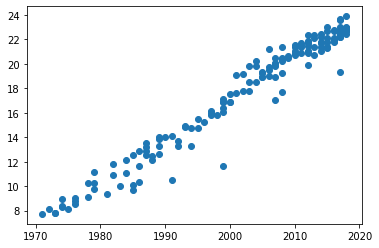

In [6]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [7]:
# Let's also center the X data so the values are not too large
# we could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [8]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# learning rate scheduler

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r= model.fit(X, Y, epochs=200, callbacks=[scheduler])



Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 2ms/sample - loss: 382.0484
Epoch 2/200
162/162 [==============================] - 0s 79us/sample - loss: 334.6552
Epoch 3/200
162/162 [==============================] - 0s 90us/sample - loss: 280.7384
Epoch 4/200
162/162 [==============================] - 0s 86us/sample - loss: 206.5017
Epoch 5/200
162/162 [==============================] - 0s 88us/sample - loss: 186.0576
Epoch 6/200
162/162 [==============================] - 0s 93us/sample - loss: 184.2987
Epoch 7/200
162/162 [==============================] - 0s 85us/sample - loss: 144.5045
Epoch 8/200
162/162 [==============================] - 0s 85us/sample - loss: 90.2165
Epoch 9/200
162/162 [==============================] - 0s 86us/sample - loss: 64.1583
Epoch 10/200
162/162 [==============================] - 0s 85us/sample - loss: 51.2118
Epoch 11/200
162/162 [==============================] - 0s 74us/sample - loss: 28.7775
Epoch 12/200
162/162 [===

162/162 [==============================] - 0s 80us/sample - loss: 0.8906
Epoch 96/200
162/162 [==============================] - 0s 76us/sample - loss: 0.8700
Epoch 97/200
162/162 [==============================] - 0s 70us/sample - loss: 0.8798
Epoch 98/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8780
Epoch 99/200
162/162 [==============================] - 0s 75us/sample - loss: 0.8705
Epoch 100/200
162/162 [==============================] - 0s 79us/sample - loss: 0.8896
Epoch 101/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8789
Epoch 102/200
162/162 [==============================] - ETA: 0s - loss: 1.131 - 0s 63us/sample - loss: 0.8752
Epoch 103/200
162/162 [==============================] - 0s 72us/sample - loss: 0.8830
Epoch 104/200
162/162 [==============================] - 0s 70us/sample - loss: 0.8755
Epoch 105/200
162/162 [==============================] - 0s 88us/sample - loss: 0.8725
Epoch 106/200
162/162 [==============

162/162 [==============================] - 0s 73us/sample - loss: 0.8703
Epoch 190/200
162/162 [==============================] - 0s 64us/sample - loss: 0.8730
Epoch 191/200
162/162 [==============================] - 0s 68us/sample - loss: 0.8719
Epoch 192/200
162/162 [==============================] - 0s 75us/sample - loss: 0.8717
Epoch 193/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8721
Epoch 194/200
162/162 [==============================] - 0s 74us/sample - loss: 0.8855
Epoch 195/200
162/162 [==============================] - 0s 77us/sample - loss: 0.8876
Epoch 196/200
162/162 [==============================] - 0s 66us/sample - loss: 0.8780
Epoch 197/200
162/162 [==============================] - 0s 73us/sample - loss: 0.8771
Epoch 198/200
162/162 [==============================] - 0s 78us/sample - loss: 0.8713
Epoch 199/200
162/162 [==============================] - 0s 88us/sample - loss: 0.8728
Epoch 200/200
162/162 [==============================] - 

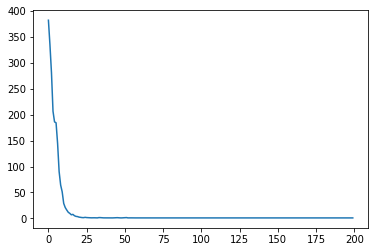

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [10]:
# Get the slope of the line
# The slope of the line is related to the doublig rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3391496]], dtype=float32), array([17.753777], dtype=float32)]


In [11]:
 # The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

Our orginal model for exponentail growth is:
<center>C = A<sub>0</sub>r<sup>t</sup></center>
Where C is the transistor count and t is the year.

r is the rate of growth. For example, when t goes from 1 to 2, C increases by a factor of r. When t goes from 2 to 3, C increases by a factor of r again.
When we tkae the log of both sides, we get:
<center>logC = logr*t+logA<sub>0</sub></center>
This is our linear equation:
<center>y' = ax + b</center>
Where:
<center>y' = logC</center>
<center>a = logr</center>
<center>x = t</center>
<center>b = logA<sub>0</sub></center>
We are interested in r, because that's the rate of growth. Given our regression wieghts, we know that:
<center>a = 0.33648866</center>
so that:
<center>r = e<sup>0.33648866</sup> = 1.400002299</center>
To find the time it tkaes for transistor count double, we simply need to find the amount of time it takes for C to increase to 2C.

Let's call the orginal starting time t, to correspond with the inital transistor count C.

Let's call the end time t', to correspond with the final transistor count 2C.

Then we also have:
<center>2C = A<sub>0</sub>r<sup>t'</sup></center>
Combine this with our original equation:
<center>C = A<sub>0</sub>r<sup>t</sup></center>
We get (by dividing the 2 equations):
<center>2C/C = (A<sub>0</sub>r<sup>t'</sup>) / A<sub>0</sub>r<sup>t</sup></center>
Which simplifies to:
<center>2 = r<sup>(t'-t)</sup></center>
Solve for t' -t:
<center>t' - t = log2/logr = log2/a</center>
Important note! We haven't specified what the starting time t actually is, and we don't have to since we just proved that this holds for any t.

In [12]:
print("Time to double:", np.log(2)/a)

Time to double: 2.0437800669536275


In [13]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a,b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


# Part 2: Making Predictions

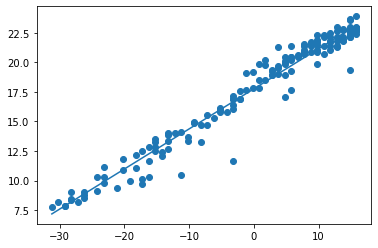

In [14]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [15]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# ( N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True